# Neuronale Netze

## Quelle der Daten

https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data (zuletzt aufgerufen: 01/2024)

https://www.framinghamheartstudy.org/ (zuletzt aufgerufen: 01/2024)

## Installation der Bibliotheken

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

import tensorflow as tf

## Einlesen der Daten

In [2]:
data = pd.read_excel("C:\\Users\\Tim\\Desktop\\Buchprojekt KI Medizin\\Programmierung\\FraminghamHeartStudy.xlsx", sheet_name = "Tabelle1")

data = data.dropna()

data.head()

,ZehnJahreKHK,Geschlecht,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,Diabetes,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker
1,0,M,38,1,20.0,0.0,0,0,0,113.0,120,84,30.0,78.0,85.0
2,0,M,47,1,20.0,0.0,0,0,0,119.0,117,79,26.0,75.0,78.0
3,1,M,66,0,0.0,0.0,0,1,0,124.0,138,91,32.0,75.0,96.0
6,1,M,51,1,7.0,0.0,0,1,0,133.0,138,78,17.0,80.0,65.0
7,0,W,36,1,3.0,0.0,0,0,0,135.0,108,74,23.0,73.0,75.0


In [3]:
data_new = pd.get_dummies(data, columns = ["Geschlecht"])

data_new.head()

,ZehnJahreKHK,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,Diabetes,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker,Geschlecht_M,Geschlecht_W
1,0,38,1,20.0,0.0,0,0,0,113.0,120,84,30.0,78.0,85.0,1,0
2,0,47,1,20.0,0.0,0,0,0,119.0,117,79,26.0,75.0,78.0,1,0
3,1,66,0,0.0,0.0,0,1,0,124.0,138,91,32.0,75.0,96.0,1,0
6,1,51,1,7.0,0.0,0,1,0,133.0,138,78,17.0,80.0,65.0,1,0
7,0,36,1,3.0,0.0,0,0,0,135.0,108,74,23.0,73.0,75.0,0,1


<Axes: >

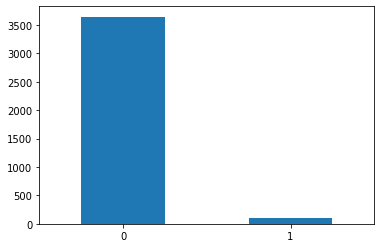

In [4]:
count_diabetes = data_new["Diabetes"].value_counts()

count_diabetes.plot(kind = "bar", rot = 0)

## Aufteilung der Daten und Resampling

In [5]:
x = data_new.iloc[:, [1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]]

y = data_new.iloc[:, 7]

In [6]:
x.head()

,Alter,Raucher,ZigProTag,BDMedikamente,Schlaganfall,ArtHypertonie,GesCholesterin,Systolisch,Diastolisch,BMI,Herzfrequenz,Blutzucker,Geschlecht_M
1,38,1,20.0,0.0,0,0,113.0,120,84,30.0,78.0,85.0,1
2,47,1,20.0,0.0,0,0,119.0,117,79,26.0,75.0,78.0,1
3,66,0,0.0,0.0,0,1,124.0,138,91,32.0,75.0,96.0,1
6,51,1,7.0,0.0,0,1,133.0,138,78,17.0,80.0,65.0,1
7,36,1,3.0,0.0,0,0,135.0,108,74,23.0,73.0,75.0,0


In [7]:
y.head()

1    0
2    0
3    0
6    0
7    0
Name: Diabetes, dtype: int64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [9]:
sm = SMOTE()

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print(y_train_res.value_counts())

0    3101
1    3101
Name: Diabetes, dtype: int64


## FCNN-Architektur

In [10]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(1, activation = tf.nn.sigmoid))

## Modelltraining und -evaluation

In [11]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = "accuracy")

In [12]:
"""
tf.keras.optimizers.Adam(
    learning_rate = 0.001, 
    beta_1 = 0.9, 
    beta_2 = 0.999, 
    epsilon = 1e-07, 
    amsgrad = False, 
    name = "adam")

tf.keras.losses.BinaryCrossentropy(
    from_logits = False,
    label_smoothing = 0.0,
    axis = -1,
    name = "binary_crossentropy")

tf.keras.metrics.Accuracy(
    name = "accuracy")
"""

'\ntf.keras.optimizers.Adam(\n    learning_rate = 0.001, \n    beta_1 = 0.9, \n    beta_2 = 0.999, \n    epsilon = 1e-07, \n    amsgrad = False, \n    name = "adam")\n\ntf.keras.losses.BinaryCrossentropy(\n    from_logits = False,\n    label_smoothing = 0.0,\n    axis = -1,\n    name = "binary_crossentropy")\n\ntf.keras.metrics.Accuracy(\n    name = "accuracy")\n'

In [13]:
model.fit(x_train_res, y_train_res, epochs = 10)

Epoch 1/10
194/194 [==============================] - 1s 2ms/step - loss: 0.8068 - accuracy: 0.8084
Epoch 2/10
194/194 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8471
Epoch 3/10
194/194 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8578
Epoch 4/10
194/194 [==============================] - 0s 3ms/step - loss: 0.2835 - accuracy: 0.8821
Epoch 5/10
194/194 [==============================] - 0s 2ms/step - loss: 0.2665 - accuracy: 0.8875
Epoch 6/10
194/194 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.8984
Epoch 7/10
194/194 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.8921
Epoch 8/10
194/194 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9112
Epoch 9/10
194/194 [==============================] - 0s 2ms/step - loss: 0.2059 - accuracy: 0.9126
Epoch 10/10
194/194 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.9247

In [14]:
model.evaluate(x_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 0.1848 - accuracy: 0.9361


[0.18477952480316162, 0.9360568523406982]